# Image classification using LeNet-5


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


## Data Loader

In [5]:
classes = ('macular_degeneration', 'else') 
path_train = '/content/drive/MyDrive/tmp/ODIR/train/'
path_valid = '/content/drive/MyDrive/tmp/ODIR/valid/'
batch_size = 40

In [6]:
trainset = torchvision.datasets.ImageFolder(root = path_train,transform=transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                                                                          transforms.Resize((128,128)),
                                                                                          transforms.ToTensor()]))
validset = torchvision.datasets.ImageFolder(root = path_valid,transform=transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                                                                          transforms.Resize((128,128)),
                                                                                          transforms.ToTensor()]))
train_iter = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
valid_iter = torch.utils.data.DataLoader(validset,batch_size=batch_size,shuffle=True)

In [7]:
tgtnames = trainset.classes
tgtnames

['else', 'macular_degeneration']

torch.Size([40])
torch.Size([40, 1, 128, 128])


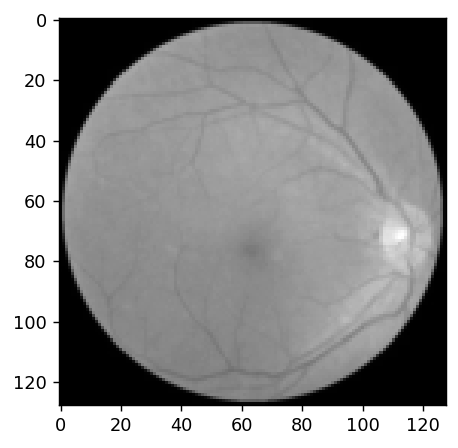

tensor(0)
else


In [8]:
dataiter=iter(train_iter)
images, labels = dataiter.next()
print(labels.shape)
print(images.shape)
I = images[0][0].numpy()
plt.figure(dpi=128)
plt.imshow(I,cmap='gray')
plt.show()
print(labels[0])
print(tgtnames[labels[0]])

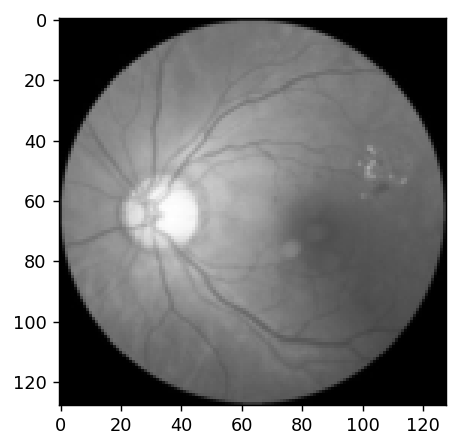

else


In [11]:
n=20
I = images[n][0].numpy()
plt.figure(dpi=128)
plt.imshow(I,cmap='gray')
plt.show()
print(tgtnames[labels[n]])

# Model (LeNet-5)

In [12]:
class Flatten(torch.nn.Module):
    def forward(self, x):
        return x.view(x.shape[0], -1)
    
net = torch.nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, padding=1),         # Layer C1  
    nn.ReLU(),                                                                  
    nn.AvgPool2d(kernel_size=2, stride=2),                                      # Layer S2  
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, padding=1),        # Layer C3  
    nn.ReLU(),                                                                    
    nn.AvgPool2d(kernel_size=2, stride=2),                                      # Layer S4  
    Flatten(),  
    nn.Linear(in_features=16*32*32, out_features=1600),                         # Layer C5   
    nn.ReLU(),
    nn.Linear(1600, 160),                                                       # Layer F6  
    nn.ReLU(),
    nn.Linear(160, 2)                                                           # Output Layer
)
net = net.to(device)
net

Sequential(
  (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten()
  (7): Linear(in_features=16384, out_features=1600, bias=True)
  (8): ReLU()
  (9): Linear(in_features=1600, out_features=160, bias=True)
  (10): ReLU()
  (11): Linear(in_features=160, out_features=2, bias=True)
)

In [13]:
torch.nn.init.xavier_uniform_(net[0].weight)
torch.nn.init.xavier_uniform_(net[3].weight)
torch.nn.init.xavier_uniform_(net[7].weight)
torch.nn.init.xavier_uniform_(net[9].weight)
torch.nn.init.xavier_uniform_(net[11].weight)
net = net.to(device)
net

Sequential(
  (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten()
  (7): Linear(in_features=16384, out_features=1600, bias=True)
  (8): ReLU()
  (9): Linear(in_features=1600, out_features=160, bias=True)
  (10): ReLU()
  (11): Linear(in_features=160, out_features=2, bias=True)
)

## PyTorch Hub

- PyTorch에서는 resnet, densenet 등 유명한 network를 쉽게 불러와서 활용할 수 있습니다.
- Input은 color image를 기준으로 네트워크 모델이 구현이 되어 있으므로, 1채널 input(흑백영상)을 활용할 때에는 model에 대한 수정이 필요합니다. 여기에서는 input을 넣을 때에 1채널을 동일하게 반복하여 넣는 방식을 사용하였습니다.
- Output의 개수는 class의 개수에 맞게 수정해 주어야 합니다.
- 활용할 수 있는 model을 아래를 참고합니다.
- https://pytorch.org/hub/research-models

In [ ]:
#net = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=True)
#print(net)

In [ ]:
#net.fc = nn.Linear(512,2,bias=True)
#net.to(device)
#print(net)

# Model Training

In [16]:
# setting hyper-parameters
learning_rate = 0.1
num_epochs = 100

# loss function and algorithm
loss = torch.nn.CrossEntropyLoss() # loss
alg = torch.optim.SGD(net.parameters(),lr=learning_rate) # sgd

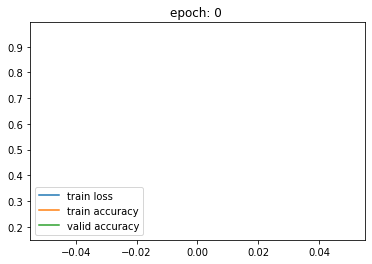

train loss:  0.1878495916620001
train accuracy:  0.9563457369804382
valid accuracy:  0.9563994407653809


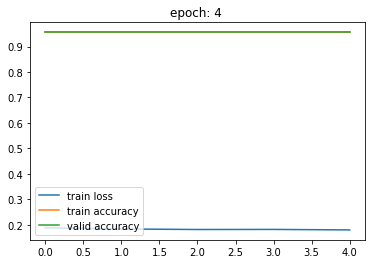

train loss:  0.17969034101579573
train accuracy:  0.9563457369804382
valid accuracy:  0.9563994407653809


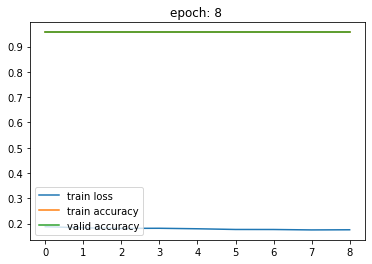

train loss:  0.17571810742358226
train accuracy:  0.9563457369804382
valid accuracy:  0.9563994407653809


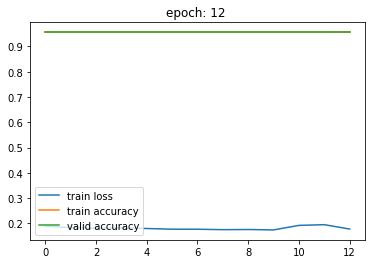

train loss:  0.17755984593104648
train accuracy:  0.9563457369804382
valid accuracy:  0.9563994407653809


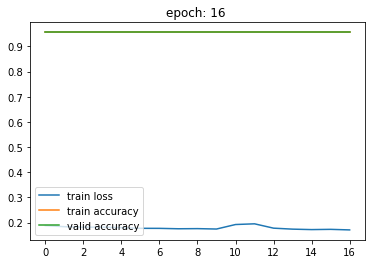

train loss:  0.17059869032639724
train accuracy:  0.9563457369804382
valid accuracy:  0.9563994407653809


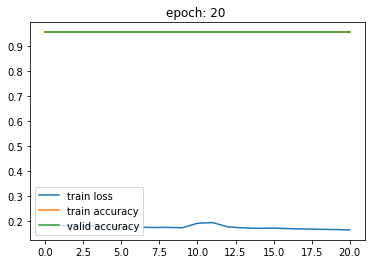

train loss:  0.16548371481728721
train accuracy:  0.9563457369804382
valid accuracy:  0.9563994407653809


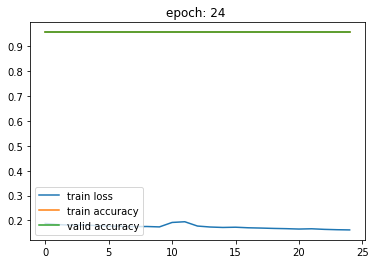

train loss:  0.1620072451504794
train accuracy:  0.9563457369804382
valid accuracy:  0.9563994407653809


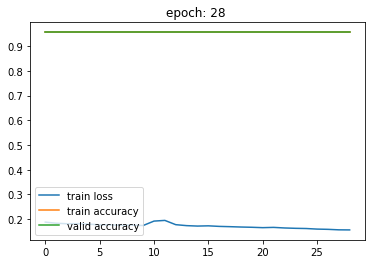

train loss:  0.15633386998743445
train accuracy:  0.9563457369804382
valid accuracy:  0.9563994407653809


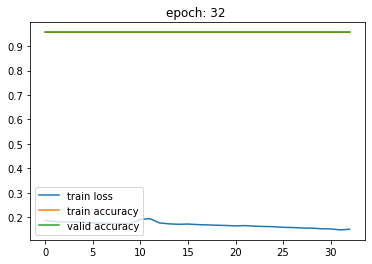

train loss:  0.15168562135496338
train accuracy:  0.9561696648597717
valid accuracy:  0.9563994407653809


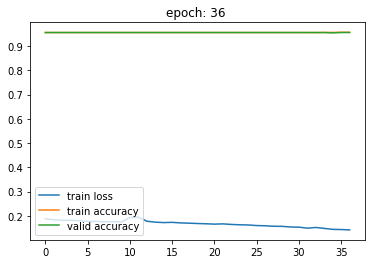

train loss:  0.14161480723561107
train accuracy:  0.9575778841972351
valid accuracy:  0.9563994407653809


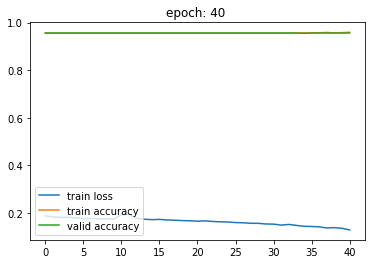

train loss:  0.12872097042057065
train accuracy:  0.9596902132034302
valid accuracy:  0.9563994407653809


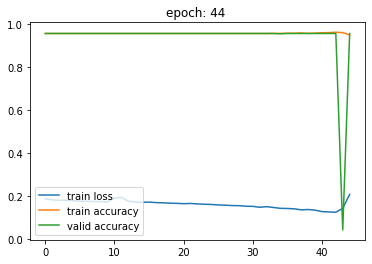

train loss:  0.20847044457922448
train accuracy:  0.9493046998977661
valid accuracy:  0.9563994407653809


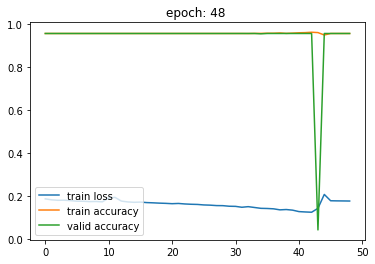

train loss:  0.17784292047674005
train accuracy:  0.9563457369804382
valid accuracy:  0.9563994407653809


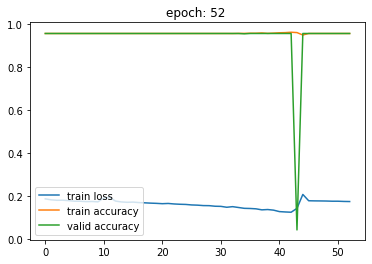

train loss:  0.17546567049893466
train accuracy:  0.9563457369804382
valid accuracy:  0.9563994407653809


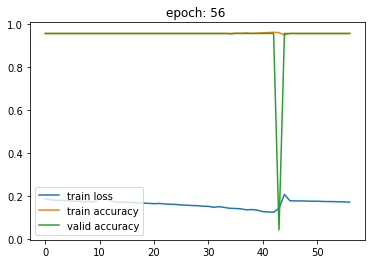

train loss:  0.17284676078316216
train accuracy:  0.9563457369804382
valid accuracy:  0.9563994407653809


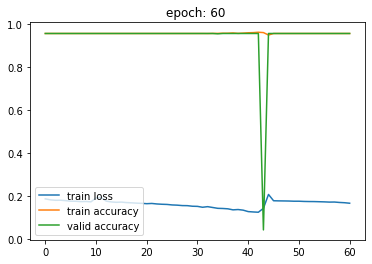

train loss:  0.16762513380784255
train accuracy:  0.9563457369804382
valid accuracy:  0.9563994407653809


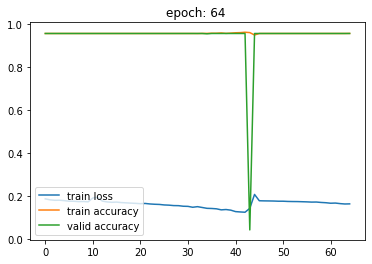

train loss:  0.16464797600165948
train accuracy:  0.9566977620124817
valid accuracy:  0.9563994407653809


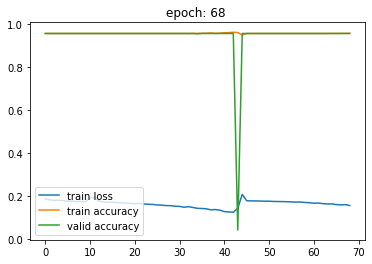

train loss:  0.15691603813971672
train accuracy:  0.9572258591651917
valid accuracy:  0.9563994407653809


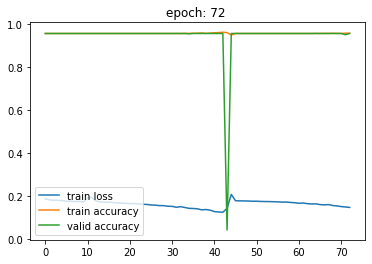

train loss:  0.14820109547434987
train accuracy:  0.9577538967132568
valid accuracy:  0.9563994407653809


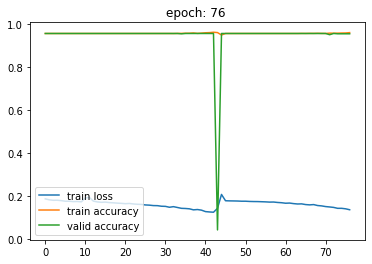

train loss:  0.1373811201615767
train accuracy:  0.9603943228721619
valid accuracy:  0.954992949962616


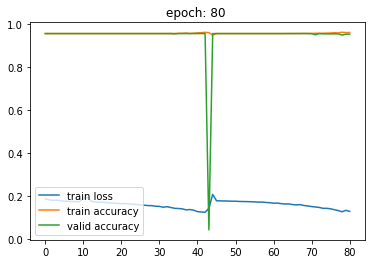

train loss:  0.1295991377397017
train accuracy:  0.9610983729362488
valid accuracy:  0.9535865187644958


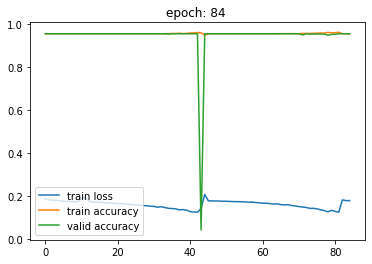

train loss:  0.17996093109771089
train accuracy:  0.9563457369804382
valid accuracy:  0.9563994407653809


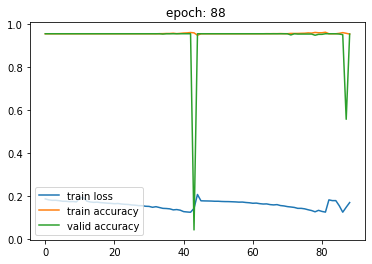

train loss:  0.17089352907834354
train accuracy:  0.9549375176429749
valid accuracy:  0.954992949962616


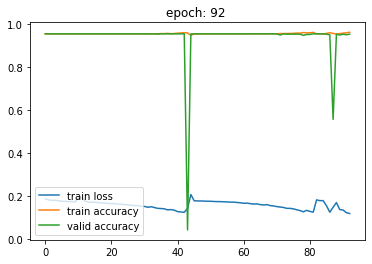

train loss:  0.12008280187220007
train accuracy:  0.9639148116111755
valid accuracy:  0.954992949962616


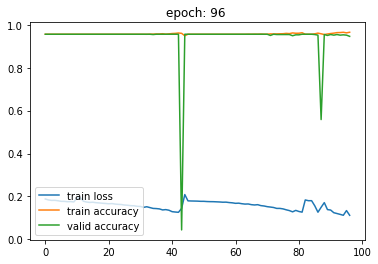

train loss:  0.11174632119132089
train accuracy:  0.9656750559806824
valid accuracy:  0.9465541243553162


In [17]:
# training the model
loss_train = np.array([])
accs_train = np.array([])
accs_valid = np.array([])

for epoch in range(num_epochs):
  i=0
  l_epoch = 0
  correct = 0
  for X,y in train_iter:
    i=i+1
    X,y = X.to(device),y.to(device)
    y_hat=net(X)
    #y_hat = net(X.repeat(1,3,1,1)) # pytorch hub model
    correct += (y_hat.argmax(dim=1)==y).sum()
    l=loss(y_hat,y)
    l_epoch+=l
    alg.zero_grad()
    l.backward()
    alg.step()

  loss_train = np.append(loss_train,l_epoch.cpu().detach().numpy()/i)
  accs_train = np.append(accs_train,correct.cpu()/len(trainset))

  correct = 0
  for X,y in valid_iter:
    X,y = X.to(device),y.to(device)
    y_hat = net(X)
    #y_hat = net(X.repeat(1,3,1,1))  # pytorch hub model
    correct += (y_hat.argmax(dim=1)==y).sum()

  #print((y_hat[:4]))
  accs_valid = np.append(accs_valid,correct.cpu()/len(validset))


  if epoch%4 == 0:
    plt.plot(loss_train,label='train loss')
    plt.plot(accs_train,label='train accuracy')
    plt.plot(accs_valid,label='valid accuracy')
    plt.legend(loc='lower left')
    plt.title('epoch: %d '%(epoch))
    plt.pause(.0001)
    plt.show()

    print('train loss: ',loss_train[-1])
    print('train accuracy: ',accs_train[-1])
    print('valid accuracy: ',accs_valid[-1])

## valdiation set results 

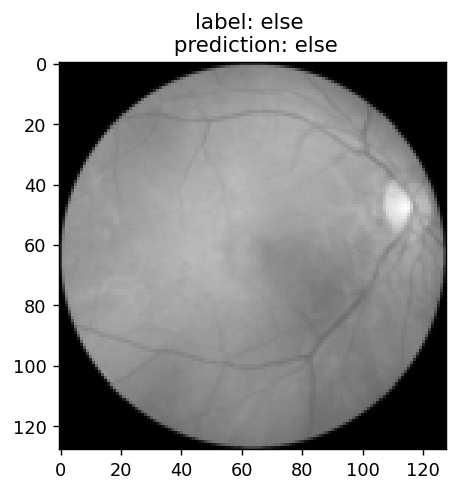

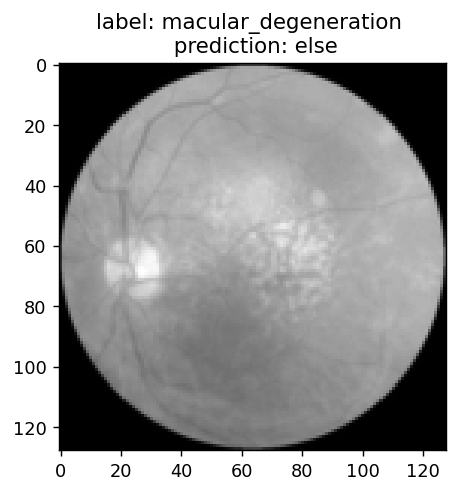

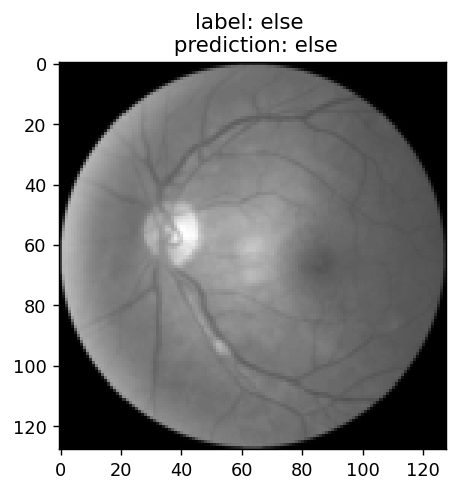

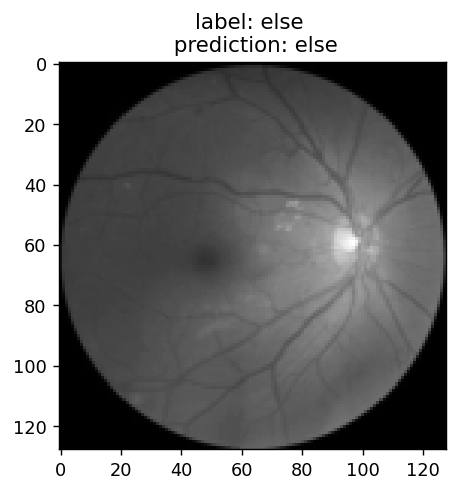

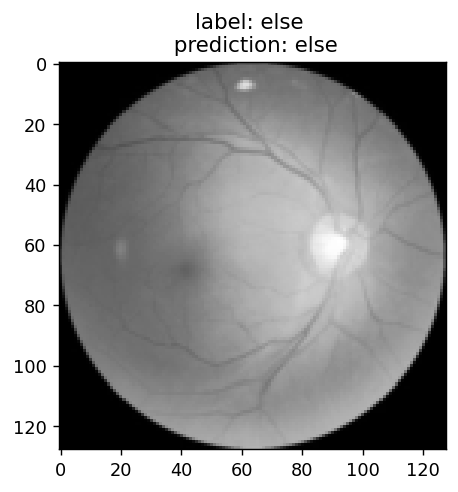

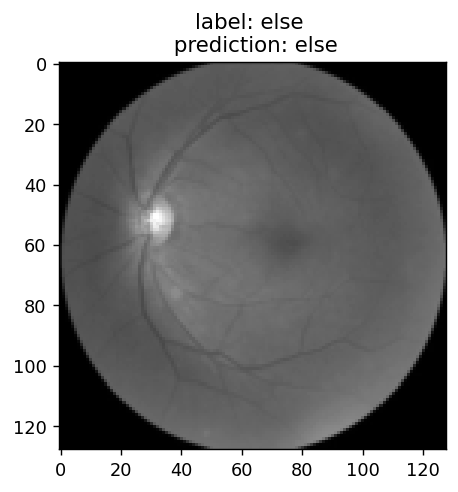

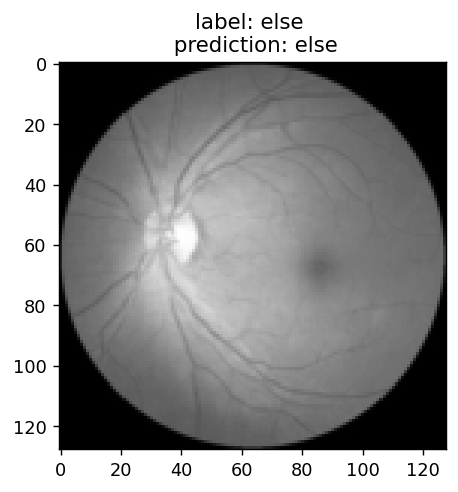

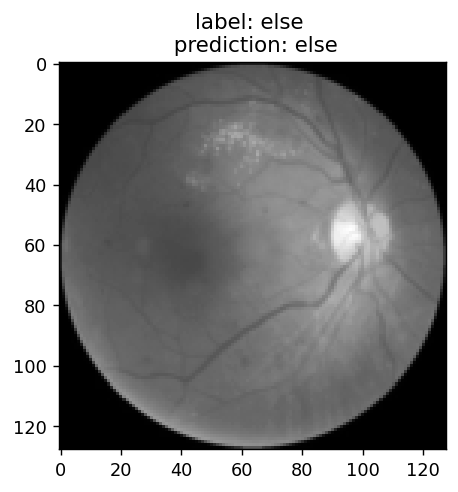

In [24]:
i = 0
for X,y in valid_iter:
  i=i+1
  X=X.to(device)
  y_hat = net(X)    
#  y_hat = net(X.repeat(1,3,1,1))  # pytorch hub model
  y_hat = y_hat.argmax(dim=1)
  for n in range(4):
    plt.figure(dpi=128)
    plt.imshow(X[n].cpu().squeeze(),cmap='gray')
    plt.title('label: %s \n prediction: %s'%(tgtnames[y[n]],tgtnames[y_hat[n]]))
    plt.pause(.0001)
  if i>1:
     break